In [1]:
#FORECASTING STOCKS
import pandas as pd
import numpy as np
stock_df = pd.read_csv('/Users/sandeepk/Desktop/Ahad_DM/Data/reliance_data.csv')

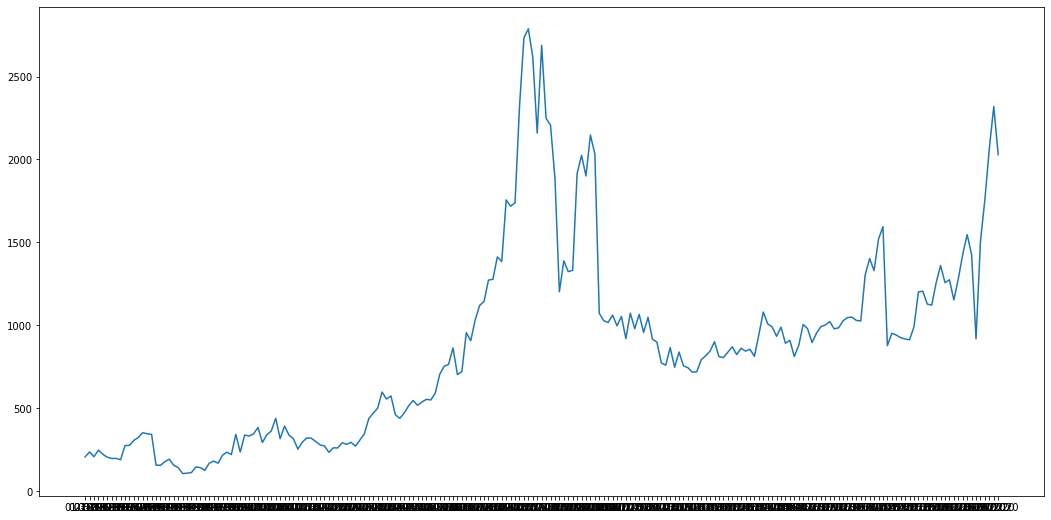

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.plot([val[-1:-8:-1][-1::-1] for val in stock_df['Date'].iloc[::30]], stock_df['Close'].iloc[::30])

In [107]:
#7 MOVING AVERAGE
sma_7 = [] 
start,end = -1,6
for val in stock_df['Close']:
    start+=1
    end+=1
    sma_7.append(np.mean(stock_df['Close'][start:end]))

In [112]:
stock_df1 = stock_df.iloc[7:]
stock_df1['7ma'] = sma_7

/var/folders/2n/y8fl7fr16hs_g_085s9fnpqm0000gn/T/ipykernel_56008/3065932762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df1['7ma'] = sma_7


In [137]:
#View correlation matrix and assess multicolinearity
stock_df1.corr()[['Close']].sort_values(by='Close', ascending = False).iloc[1:]

,Close
Last,0.999982
VWAP,0.999855
Low,0.999579
High,0.999561
Open,0.999151
Prev Close,0.998624
7ma,0.996227
Trades,0.597751
Turnover,0.482515
Deliverable Volume,0.149449


In [173]:
#Import Libraries for Modeling tasks
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [187]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(stock_df1[['VWAP', 'Prev Close', '7ma']],\
                                                               stock_df1['Close'], test_size = 0.2, random_state = 0)

In [ ]:
#SCALE DATA

In [204]:
#CROSS VALIDATION - K-fold
lr = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds) #5-fold cross val r2 scores
for k,v in list(enumerate(scores)): print(f'Fold #{k+1}: {v}')

Fold #1: 0.9996941117209004
Fold #2: 0.9997170311772241
Fold #3: 0.9997323865363172
Fold #4: 0.9997295720988231
Fold #5: 0.9997870640097932


In [ ]:
#do grid search on lasso alpha value to optimize

In [ ]:
#7 day moving average
#Avg weekly volume
#Prev close price


In [ ]:
#REGRESSION
#HOLT WINTERS
#KNN -ALGO
#ENSEMBLE METHOD?